# _Python for Scientific Data Analysis_


#    Matplotlib

## Section 1: The Very Basics of Plotting with Matplotlib


### What is Matplotlib?

As the package website says (https://matplotlib.org/), **_matplotlib_** "*is a comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib makes easy things easy and hard things possible.*"  

Another way of saying this is that **matplotlib** let's you make really slick plots and other visualizations.  Or at least ones that don't look like they were done before the Internet was a thing (cough, superMongo/IRAF, cough).  

Matplotlib now forms the backbone of most of my plotting and basic data science and analysis routines: while I still like IDL's routines better for quick diagnostic plots, I've switched to **_matplotlib_** Python for most publication-grade figures. 

### Importing and Running Matplotlib

Again, matplotlib can do a ton of stuff.  But 90+% of the time, you will want to be using its core plotting capabilities contained in _pyplot_ .   To load, you type the following in either interactive Python or an executable piece of code:

In [2]:
import matplotlib.pyplot as plt

Note: some textbooks _assume_ you know this (why? beats me).  Or they have you import _everything_ in matplotlib (e.g. ```from matplotlib import *```), which is total overkill.   We are going to be more targeted.  

### Setting Styles

Matplotlib is heavily customizable and can use a bunch of different "styles" (i.e. canned configuration sets) for visualization.  

#### _Style_  

To see your options, you use ``matplotlib.style.available``

In [4]:
import matplotlib

###
matplotlib.style.available

#When I run this, I get the following:

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

You can see the effect of the different styles here:

[https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html]()

To set the style to some value besides that in your default do:

``plt.style.use([somevalue]``

E.g.

``plt.style.use('seaborn')``.


To revert back to your default style do

``plt.style.use('default')``


#### _rcParams_  

The default (or any other) style consists of a number of individual settings.  Instead of going from one canned configuration to another, you can adjust individual settings using ``rcParams``.  You can figure out what these parameters are by:


In [5]:
from matplotlib import rcParams

#then

rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'both',
          'axes.grid.which':

You can change individual settings by accessing rcParams.  E.g. by default, the axis grid is turned off.  To turn it on,

```
rcParams['axes.grid']=True
```

You can also turn it on via ``plt``

``plt.grid()``

or (later) by the ax object if we create a fig,ax pair : ``ax.grid()``  (if you don't know what this means, don't worry about it for now).

To turn it back off do

``plt.grid('off')``.


### Displaying Plots and Images

Matplotlib is a visualization package, so then how do you actually visualize images and plots?   The best way to display graphics from Matplotlib depends on how you are using it.  

_plt.show()_

The primary way I use it is within an executed Python function.   In this case, the key command is ``plt.show()``.

 ``plt.show()`` is just how it sounds: you create a plot with data, axes, labels, and other stuff you want to include and then just show the plot.   
 
 It is usually pretty solid but it works by interacting with your systems interactive graphical backend.  So if your system setup is odd (most often Windows is the problem child; MacOS should be fine), you might run into trouble.  But in most cases, this is not an issue.
 
  _plotting from wihtin iPython shell_

 
 As vanderPlas says, "it can be very convenient to use Matplotlib interactively within an IPython shell (see IPython: Beyond Normal Python). IPython is built to work well with Matplotlib if you specify Matplotlib mode." (sorry, I felt like just copying and pasting).

To make this work, you first do 
 
 ```
In [1]: %matplotlib
Using matplotlib backend: TkAgg
```
then

```

In [2]: import matplotlib.pyplot as plt
 
 ``` 
 
 Now, any ``plt`` command will cause a graphics window to open.Some changes (such as modifying properties of lines that are already drawn) will not draw automatically: to force an update, use plt.draw(). Using plt.show() in Matplotlib mode is not required.

_matplotlib %inline_
 
 If you use Jupyter Notebooks, you are probably familiar with this one.   
 
 The key command (after importing matplotlib.pyplot as plt) is 
 
 ```
 %matplotlib inline
 
 ```
 
 After running this command (it needs to be done only once per kernel/session), any cell within the Jupyter notebook that creates a plot will embed a PNG image of the resulting graphic.
 
This is great for pedogagy (er, teaching).  But professional code is usually a lot more complex, so its usefulness beyond learning stuff in the class may be limited.

---

For this notebook I am going to use %matplotlib inline.  To make display easier, I'm also going to make the images a larger default size with rcParams.

In [19]:
%matplotlib inline
rcParams['figure.figsize']=[12,8]

### Saving Output

One thing I really like about Matplotlib is the ability to save graphics to a file in a wide range of formats without a lot off guff.  The basic command to remember is:

```
plt.savefig([name of figure].[extension]).  

```

The ``[extension]`` should indicate the type of file.  As an example, say you want to save the file as "Figure_1" with the format of a PNG.   Then your command is going to be

```
[do all the matplotlib plot-y stuff to create the figure]

plt.savefig("Figure_1.png")

```

For PDF ...

```
[do all the matplotlib plot-y stuff to create the figure]

plt.savefig("Figure_1.pdf")

```

And so on.   To see all the supported file types do this:


```
import matplotlib.pyplot as plt
fig=plt.figure()

fig.canvas.get_supported_filetypes()
#this will print out a lot of stuff
```

You will see eps, jpg, jpeg,pdf,png,ps, ...etc etc.   


But the ones I always use now are either:

* png (for quick figures) 
* pdf (for vectorized figures that Science and Nature will not complain about).

Encapsulated postscript (eps) is older but also vectorized (good!) but it's kind of a weird format.   Some platforms don't like it and will want you to convert to PDF anyway (this happens to me with bibtex).

---

### Some Simple Plots

Now that we have those preliminaries out of the way, let's actually do stuff with Matplotlib.

#### _A Simple Scatter Plot_

Let's begin with some very simple plots: a simple scatter plot and a line plot.   In order to do this, we need data of some kind (any kind).   

In our first example (a _**scatter**_ plot) we will just make up data: i.e. we choose an array of numbers as our x array and an equation including a random number generator from _**numpy**_ as our y array.  

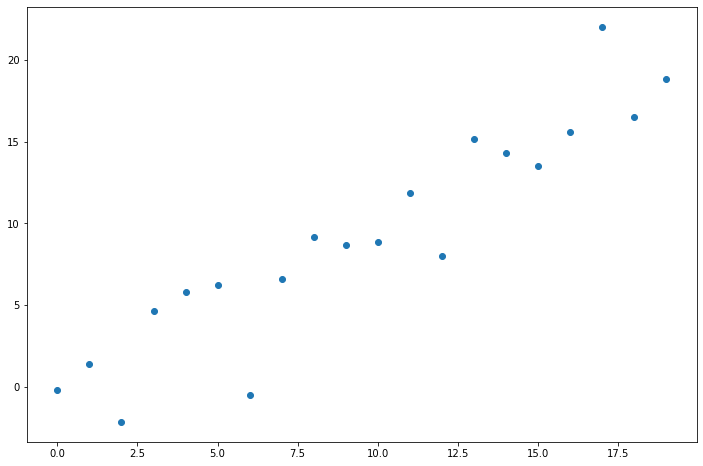

In [25]:
###(Ex_1.1)

#importing pyplot
import matplotlib.pyplot as plt

#this will allow use NumPy's random number generator
import numpy as np 

#https://numpy.org/doc/stable/reference/generated/numpy.arange.html

xarray=np.arange(20)   #an array of numbers from 0 to 19
yarray=np.arange(20)+3*np.random.randn(20) 
#y is same as x EXCEPT now we vary the value +/- some random number about x

#scatter plot of xarray and yarray
plt.scatter(xarray,yarray)

#show the plot
#plt.show()


#![](./code/sect1/figures/Ex1_1.png)

Note: there are a lot of ways to generate random numbers, depending on what you want the distribution to look like.  The following URL gives a list of different random functions available in _**numpy**_:
[https://numpy.org/doc/stable/reference/random/legacy.html#functions-in-numpy-random]()

#### _A Simple Line Plot_

We can also plot these data as a straight line, using the ```plt.plot``` command.  We can retain the dots by adding the variable *marker* to the plot call (i.e. ``plt.plot(x,y,marker='o')``) 

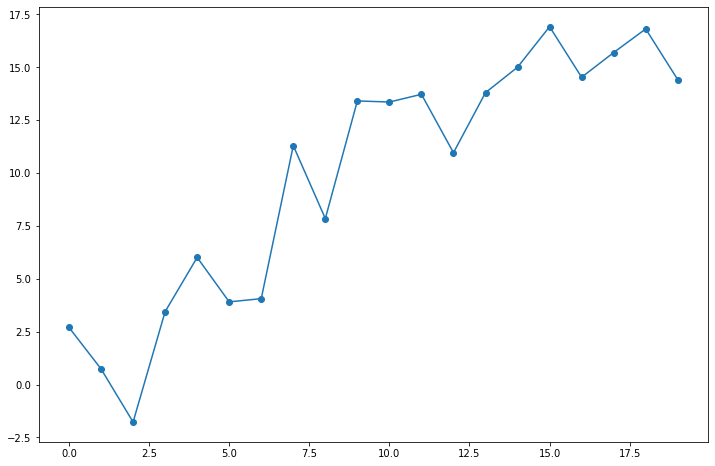

In [26]:
###(Ex_1.2)

import matplotlib.pyplot as plt
import numpy as np 

xarray=np.arange(20)   
yarray=np.arange(20)+3*np.random.randn(20) 

#line plot of xarray and yarray
plt.plot(xarray,yarray, marker='o')

#plt.show()

#![](./code/sect1/figures/Ex1_2.png)

Note that the positions of the points has changed compared to image Ex_1.1 because we have performed a new random number generation.

#### _Plotting a Simple Line Fit to Scatter Plot Data_

Now, the plot we just did simply connects different points, which isn't that interesting.  We can _fit_ data to a function using NumPy or other packages.   The simplest version of this functional fit is a polynomial fit of degree one (i.e. a straight line).   So we will need to import the _**numpy**_ package first, and then use the fitting packages to fit the data to a polynomial.  The _**numpy**_ package _*polyfit*_ can fit a polynomial function to data (which includes a straight line).

0.9393157612779487 -0.8168122482574897


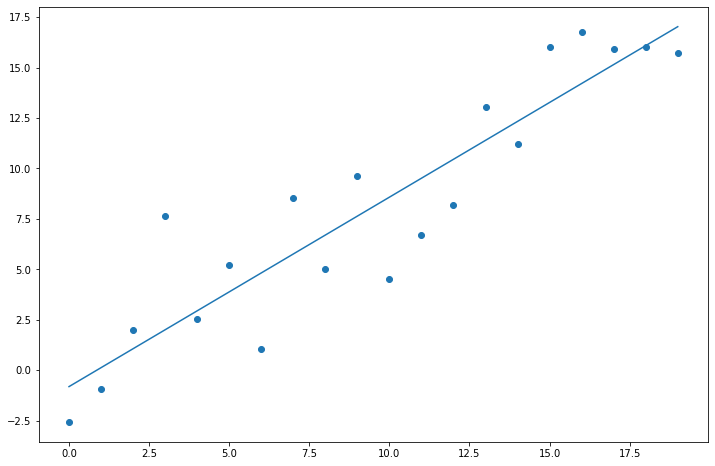

In [27]:
###(Ex_1.3)

import matplotlib.pyplot as plt
import numpy as np 

xarray=np.arange(20)   
yarray=np.arange(20)+3*np.random.randn(20) 

#https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html
#a polynomial fit of degree one
a,b=np.polyfit(xarray,yarray,1)


plt.scatter(xarray,yarray)
plt.plot(xarray,xarray*a+b)
print(a,b) # this shows as 0.939,-0.817 for my example

#plt.show()
#![](./code/sect1/figures/Ex1_3.png)

### Simple Plot Customization
Now, the plot does not give an indication of what is actually displayed.  Let's change that:
####_Plot and Axis Labels_


- Labels to the coordinates, given by _plt.xlabel_ , _plt.ylabel_ , and _plt.title_ .  We can further alter the font for these labels.

See here for more details: <br>
[https://matplotlib.org/stable/api/\_as\_gen/matplotlib.pyplot.xlabel.html]() and 
[https://matplotlib.org/stable/api/\_as\_gen/matplotlib.pyplot.title.html]()

and some details here for altering font:
[https://matplotlib.org/stable/gallery/text\_labels\_and\_annotations/text\_fontdict.html#sphx-glr-gallery-text-labels-and-annotations-text-fontdict-py]()

- A few other things to note for labels that will be applicable later.  First, you can use ``r'[your label]'`` to write things in math text instead of plain text (useful if you have LaTeX symbols or variables as labels).   And second, on that note, you can use ``$`` to write LaTeX'd labels. 


#### _Data Customiziation_

We also can change ...

- *Sizes* of symbols in a scatter plot by the _s_ variable (e.g. ``plt.scatter(x,y,s=75)`` sets the symbol size to 75).  Note that the default symbol size for a simple scatter plot with dots is about 50.

-  The *type* of symbols -- "marker" in matplotlib-speak --  for points in a scatter plot denoted by ``marker = [some value]``.  E.g. `` plt.scatter(x,y,marker="<")`` is a left-pointing triangle; `` marker="s" `` is a square. 

  
-   For lines, *linestyle* changes the style of the line.  E.g. plt.plot(x,y,linestyle='dashdot') gives a dash-dot line; while plt.plot(x,y,linestyle='solid') gives a solid line.


- *c* controls the marker color.  E.g. ``plt.scatter(x,y,c='b')`` will plot blue symbols, 'c' will plot cyan, etc.  Similarly, *edgecolors* controls the color of the edge (i.e. outline) of the marker.  So ``plt.scatter(x,y,c='b',edgecolors='black')`` would now make the edges of the plot symbols (again, 'marker' in matplotlib-speak) black.

- *alpha* controls the transparency.  E.g. ``alpha = 1`` is fully opaque, while `` alpha = 0`` is transparent (invisible).  

See here for more details on many of these:

[https://matplotlib.org/stable/api/\_as\_gen/matplotlib.pyplot.scatter.html]() <br>
[https://matplotlib.org/stable/api/markers\_api.html]()<br>
[https://matplotlib.org/stable/gallery/lines\_bars\_and\_markers/linestyles.html]()<br>
[https://matplotlib.org/stable/tutorials/colors/colors.html]()

####_Legends_

We can also attach legends to denote what is being plotted through ``plt.legend``.  To make this work, you add a *label* to each array of data you are plotting.  Then call *legend*.  So where do you put the legend?   You can control that answer with the *loc* keyword.  There are a lot of named values for *loc* that are self-explanatory: e.g. ``loc='upper left'`` puts the legend in the upper-left part of the plot.  ``loc='best' `` chooses the location amongst named ones with the least overlap with plotted stuff (jargon-y description: "least overlap with drawn artists").   Or, you can provide a 2-tuple giving he coordinates of the lower-left corner of the legend in axis coordinates. 

 Other keywords include *title*, *framealpha*, etc.  See below for the full API documentation:

[https://matplotlib.org/stable/api/\_as\_gen/matplotlib.pyplot.legend.html]() <br>

####A Worked Example ...

Below is an example of more customized plot incorporating all of these elements.

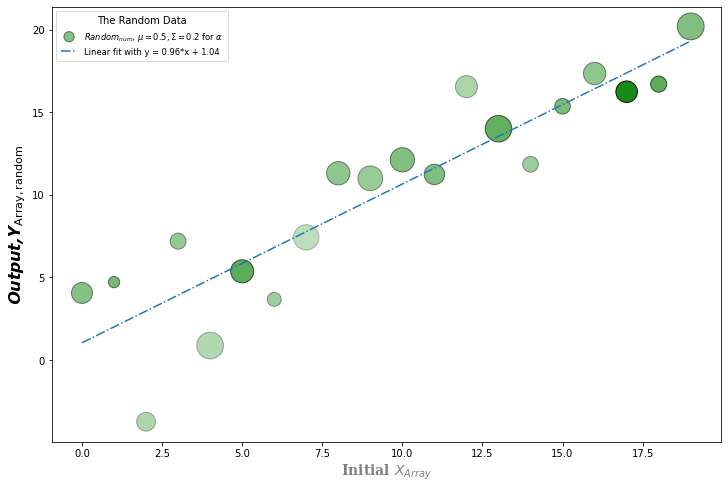

In [28]:
###(Ex_1.4)

import matplotlib.pyplot as plt
import numpy as np 
xarray=np.arange(20)
yarray=np.arange(20)+3*np.random.randn(20)

 #https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html
 #a polynomial fit of degree one

a,b=np.polyfit(xarray,yarray,1)

#set symbol size to a random value between 0 and 1

#same as 5*np.random.rand(20) 
   #since the length of yarray is 20 elements
symsizeval=5*np.random.random(len(yarray))  
symsizeval*=150

#set alpha value to be a random number drawn from a normal distribution with mean of 0.5 and sigma of 0.2
mu,sigma=0.5,0.2
alphaval=np.random.normal(mu,sigma,len(yarray))

# a simple cheat to catch randomized alpha values that are not between 0.1 and 1
bad=np.where((alphaval <= 0.1) | (alphaval > 1))
alphaval[bad]=0.5

 #line plot of xarray and yarray
   #varying color, marker, size, and transparency
plt.scatter(xarray,yarray,color='g',marker='o',s=symsizeval,edgecolor='black',alpha=alphaval,
      label=r'$Random_{num}$, $\mu = 0.5, \Sigma = 0.2$ for $\alpha$')

plt.plot(xarray,xarray*a+b,color='tab:blue',
     linestyle='-.',label='Linear fit with y = {0:.2f}*x + {1:.2f}'.format(a,b)) 
     #linestyle is same as linestyle='dashdot'

plt.xlabel('Initial $X_{Array}$',font='serif',size=14,color='gray',weight='heavy')
plt.ylabel(r'Output,Y$_{\rm Array, random}$',font='Verdana',size=16,style='italic',weight='bold')

plt.legend(loc='upper left',fontsize='small',borderpad=0.6,markerscale=0.5,
    shadow=False,framealpha=0.7,title='The Random Data')
  


#plt.show()



#### The Fig, Axes Objects ...

Now we can get more sophisticated by splitting plt up into separate **_fig_** and **_ax_** objects by calling ```plt.subplots```.  Here's an example: ```fig,axes = plt.subplots()```.  For reasons that take too long to explain right now, this will give us more control over the presentation of our plots later.   And -- you guessed it -- it will allow us to do *_subplots_*. 

 BE CAREFUL, though: some of the syntax to do different things changes in subtle ways. For instance, instead of ```plt.xlabel('[name of label'])``` the call is ```axes.set_xlabel(['name of label'])```

You can also modify the plot dimensions using the **_figsize__** variable within **_subplots_** : ```fig,axes = plt.subplots(figsize=(xsize,ysize))```, where *xsize* and *ysize* are numbers.

Here's an example of the previous plot with less-obnoxious formatting and using the ```fig,axes``` call to create a single plot of a specified size/dimension.

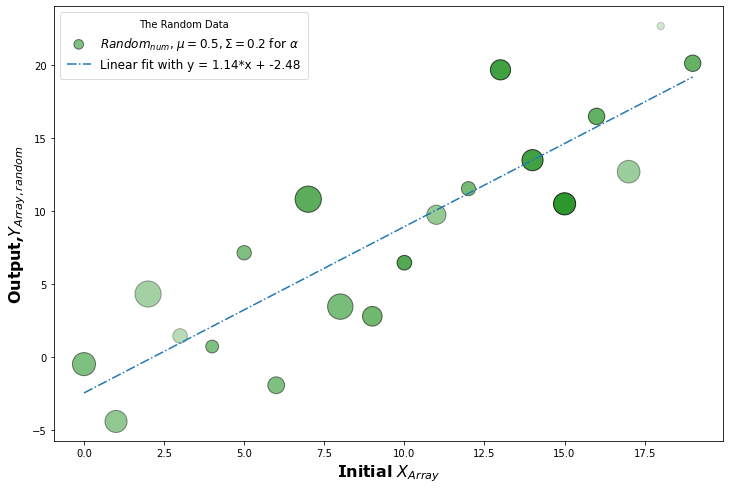

In [38]:
###(Ex_1.5)


import numpy as np 
#this will allow use NumPy's random number generator AND use the polynomial fit

xarray=np.arange(20)
yarray=np.arange(20)+3*np.random.randn(20)

 #https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html
 #a polynomial fit of degree one

a,b=np.polyfit(xarray,yarray,1)

#set symbol size to a random value between 0 and 1

#same as 5*np.random.rand(20) since the length of yarray is 20 elements
symsizeval=5*np.random.random(len(yarray))  
symsizeval*=150

#set alpha value to be a random number drawn from a normal distribution with mean of 0.5 and sigma of 0.2
mu,sigma=0.5,0.2
alphaval=np.random.normal(mu,sigma,len(yarray))

# a simple cheat to catch randomized alpha values that are not between 0.1 and 1
bad=np.where((alphaval <= 0.1) | (alphaval > 1))
alphaval[bad]=0.5


fig,axes=plt.subplots(figsize=(12,8))   

 #line plot of xarray and yarray
   #varying color, marker, size, and transparency
axes.scatter(xarray,yarray,color='g',marker='o',s=symsizeval,edgecolor='black',alpha=alphaval,
      label=r'$Random_{num}$, $\mu = 0.5, \Sigma = 0.2$ for $\alpha$')

axes.plot(xarray,xarray*a+b,color='tab:blue',
  linestyle='-.',label='Linear fit with y = {0:.2f}*x + {1:.2f}'.format(a,b)) 
  #linestyle is same as linestyle='dashdot'

axes.set_xlabel('Initial $X_{Array}$',font='Verdana',size=16,color='black',weight='bold')
axes.set_ylabel(r'Output,$Y_{Array, random}$',font='Verdana',size=16,color='black',weight='bold')

axes.legend(loc='upper left',fontsize='large',borderpad=0.6,markerscale=0.5,
    shadow=False,framealpha=0.7,title='The Random Data')


# plt.show()



#![](./code/sect1/figures/Ex1_5.png)

###Plots with Error Bars

All measurements have uncertainties associated with them, so we need to plot data with error bars.   The _**errorbar**_ function allows you to do this.  _errorbar_ can be called with plt. (e.g. _**plt.errorbar**_) or with the axes object (_**axes.errorbar**_).

The full API documentation is here:
[https://matplotlib.org/stable/api/\_as\_gen/matplotlib.pyplot.errorbar.html]()


Key variables include _yerr_ (array of Y errors), _xerror_ (array of X errors), _ecolor_ (color of errorbars), _elinewidth_ (their width), etc.  If you want to plot just the data (no connecting lines) then you the _ls_ keyword is important (set it to ``ls='none'`` in this case).    _**errorbar**_ uses keywords from _**plt.plot**_ , so these will be a bit different than _**plt.scatter**_.  E.g. _ms_ is the markersize (not _s_ as in _**plt.scatter**_) and the scaling is different than in a scatter plot (see code below). _markeredgecolor_ is used, not _edgecolor_. 

Here is an example of an errorbar plot where we define the fig, axes objects and construct the plot from the axes object:

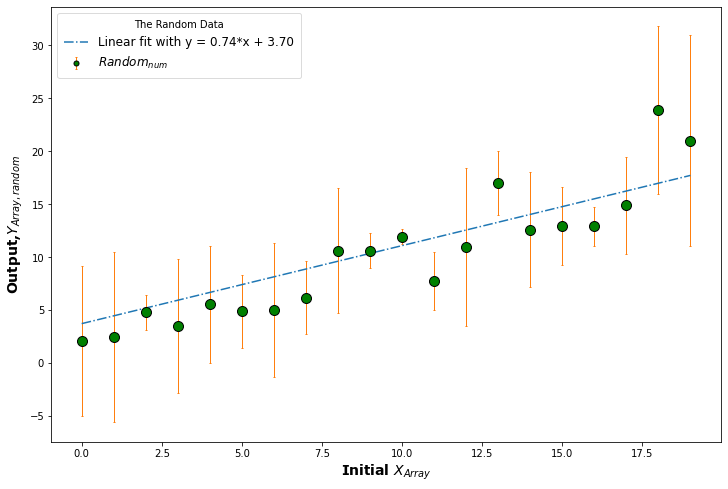

In [43]:
###(Ex_1.6)


xarray=np.arange(20)
yarray=np.arange(20)+3*np.random.randn(20)

#create a gaussian distribution of errors centered on 3 with standard deviation of 0.25
 #mu_error,sigma_error=3,0.25 #not used
 
error_yarray=10*np.random.random(20)+0.1

# remove bad error values: below 0.1
baderror=np.where(error_yarray < 0.1)
error_yarray[baderror]=0.1

a,b=np.polyfit(xarray,yarray,1,w=1/error_yarray)

#set symbol size to constant value
symsizeval=100

#set transparency to 1 for everything
alphaval=1

fig,axes=plt.subplots(figsize=(12,8))

 #line plot of xarray and yarray
   #varying color, marker, size, and transparency

#**** errorbar plot of xarray, yarray, and error_yarray
   #note that "ms" the 'markersize' has different units. 
       # 'markersize' values are = number of points; s in scattere plot = number_of_points**2.
axes.errorbar(xarray,yarray,error_yarray,ms=np.sqrt(symsizeval),ls='none',
     color='g',marker='o',markeredgecolor='black',linewidth=1,alpha=alphaval,
       capsize=1,ecolor='tab:orange',label=r'$Random_{num}$')

#plot the line fit
axes.plot(xarray,xarray*a+b,color='tab:blue',linestyle='-.',label='Linear fit with y = {0:.2f}*x + {1:.2f}'.format(a,b)) #linestyle is same as linestyle='dashdot'

axes.set_xlabel('Initial $X_{Array}$',font='Verdana',size=14,color='black',weight='bold')
axes.set_ylabel(r'Output,$Y_{Array, random}$',font='Verdana',size=14,color='black',weight='bold')

axes.legend(loc='upper left',fontsize='large',borderpad=0.6,markerscale=0.5,
    shadow=False,framealpha=0.7,title='The Random Data')


# plt.show()

#![](./code/sect1/figures/Ex1_6.png)

Now, there are some limitations with what _errorbar_ can do.   For one, it does not allow you to imput an array for parameters like markersize, alpha, etc. in plots 1--5 because this is not allowed with _plot_ either.  To (mostly) work around this, you can plot the data in a _for_-loop or resort to other trickery.  Here's an example of the latter, where I sandwich an open circular symbol in between _errorbar_ and _scatter_ to effectively allow arrays for markersize, alpha, etc:

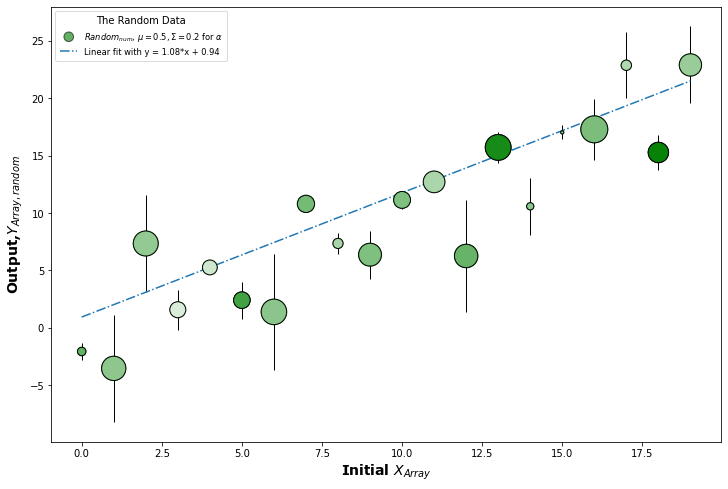

In [47]:
###(Ex_1.7)



xarray=np.arange(20)
yarray=np.arange(20)+3*np.random.randn(20)

error_yarray=5*np.random.random(20)+0.1

 #https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html
 #a polynomial fit of degree one

a,b=np.polyfit(xarray,yarray,1,w=1/error_yarray)

#set symbol size to a random value between 0 and 1

symsizeval=5*np.random.random(len(yarray))  
  #same as 5*np.random.rand(20) since the length of yarray is 20 elements
symsizeval*=150

#set alpha value to be a random number drawn from a normal distribution with mean of 0.5 and sigma of 0.2
mu,sigma=0.5,0.2
alphaval=np.random.normal(mu,sigma,len(yarray))

# a simple cheat to catch randomized alpha values that are not between 0.1 and 1
bad=np.where((alphaval <= 0.1) | (alphaval > 1))
alphaval[bad]=0.5


fig,axes=plt.subplots(figsize=(12,8))

 #line plot of xarray and yarray
   #varying color, marker, size, and transparency

axes.errorbar(xarray,yarray,error_yarray,ms=.001,ls='none',color='g',marker='.',
   markeredgecolor='black',linewidth=1,ecolor='black',alpha=1,zorder=0)

axes.scatter(xarray,yarray,color='w',marker='o',s=symsizeval,edgecolor='black',alpha=1,zorder=1)

axes.scatter(xarray,yarray,color='g',marker='o',s=symsizeval,edgecolor='black',alpha=alphaval,
      label=r'$Random_{num}$, $\mu = 0.5, \Sigma = 0.2$ for $\alpha$',zorder=2)


axes.plot(xarray,xarray*a+b,color='tab:blue',zorder=0,linestyle='-.',
    label='Linear fit with y = {0:.2f}*x + {1:.2f}'.format(a,b)) 
    #linestyle is same as linestyle='dashdot'

axes.set_xlabel('Initial $X_{Array}$',font='Verdana',size=14,color='black',weight='bold')
axes.set_ylabel(r'Output,$Y_{Array, random}$',font='Verdana',size=14,color='black',weight='bold')

axes.legend(loc='upper left',fontsize='small',borderpad=0.6,markerscale=0.5,
    shadow=False,framealpha=0.7,title='The Random Data')


 #plt.show()



#![](./code/sect1/figures/Ex1_7.png)

Note one other key parameter set with the plot calls: _**zorder**_.  _zorder_ functions in a similar way to _sendtoback_ or _bringtofront_ in Microsoft Powerpoint: i.e. it determines the stacking of different points (imagine a z-axis extending outward from your plot: _zorder_ determines the location of each thing being plotted along this axis).